$$\require{mhchem}$$       

# Transient CSTR

Consider a transient CSTR with the following kinetics:
\begin{align*}
\ce{A->[k]B}
\end{align*}
There is an inlet feed at temperature $T_0$, with a concentration $C_{A,0}$.
The various parameters are

| Parameter        | Value  $\quad\quad\quad$          | Units    |
|----------------|------------------|----------|
| $T_0$        | 298              | K        |
| $T_m$        | 298              | K        |
| $\hat{C}_p$    | 4.0              | kJ/kg K  |
| $C_{A,0}$       | 2.0              | kmol/m$^3$ |
| $k_m \: (T_m)$     | 0.004            | 1/min    |
| E            | $1.5 \times 10^4$ | K        |
| $\rho$       | $10^3$           | kg/m$^3$   |
| $\Delta H_R$ | $-2.2 \times 10^5$  | kJ/kmol  |
| U | 340 | kJ/min/K|

You can assume a reactor size of 1 m$^3$. The residence time ($\tau$) is 30 min, and from that the volumetric feed rate can be calculated ($\nu=V/\tau$). Heat is transferred to the reactor with a cooling jacket with heat transfer coefficient $U$ and a set point of $T_{set}=298$ K.

#### Calculate the concentration and temperature profile for the first 500 minutes. (4 points)

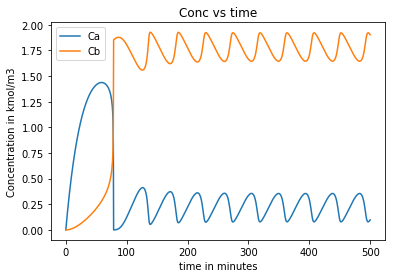

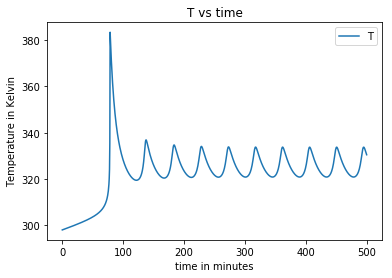

In [1]:
V = 1 #m3
tau = 30 #min
v0 = V/tau #m3/min
Tset  = 298 #K
T0 = 298 #K
Tm = 298 #K
Cp = [4,4] #kJ/kgK
Ca0 = 2 #kmol/m3
km = 0.004 #1/min
ER = 1.5*(10**4) #K
rho = 1000 #kg/m3
dHrxn0  = -2.2*(10**5) #kJ/kmol
U =  340 #kJ/min/K
alpha = [-1,1]
Cp = [4*rho/Ca0,4*rho/Ca0] #kJ/kmol
Fa0 = Ca0*v0
Fb0 = 0
F0 = [Fa0,Fb0,T0]
Ninit = [0.00001,0.00001,298.]
import numpy as np

def transient_cstr (N,t):
    Na,Nb,T = N
    Ca = Na/V
    Cb = Nb/V
    
    
    Fa = Na*v0/V
    Fb = Nb*v0/V
    dcp = np.dot(Cp,alpha)
    dHrxn = dHrxn0 + dcp*(T-T0) #delta H reaction as a function of temperature
    k = km*np.exp(-ER*(1/T-1/T0)) #k at given temperature
    Ca = Na/V
    r = k*Ca
    ra = -r
    rb = r
    dNadt = Fa0 - Fa + ra*V
    dNbdt = Fb0 - Fb + rb*V
    Qdot = U*(Tm-T)
    dTdt = ((Fa0*Cp[0]+Fb0*Cp[1])*(T0-T)-dHrxn0*r*V+Qdot)/(Na*Cp[0]+Nb*Cp[1])
    return [dNadt,dNbdt,dTdt]

t = np.linspace(0,500,1000)
from scipy.integrate import odeint as o
a = o(transient_cstr,Ninit,t)
import matplotlib.pyplot as plt
#print(a)
plt.plot(t,a[:,0],t,a[:,1])
plt.xlabel("time in minutes")
plt.ylabel("Concentration in kmol/m3")
plt.title("Conc vs time")
plt.legend(["Ca","Cb"])
plt.show()


plt.plot(t,a[:,2])
plt.xlabel("time in minutes")
plt.ylabel("Temperature in Kelvin")
plt.title("T vs time")
plt.legend(["T"])
plt.show()


#### Calculate a steady state solution for $C_{A,0}$ and temperature, T. (3 points)

In [2]:

V = 1 #m3
tau = 30 #min
v0 = V/tau #m3/min
Tset  = 298 #K
T0 = 298 #K
Tm = 298 #K
Cp = [4,4] #kJ/kgK
Ca0 = 2 #kmol/m3
km = 0.004 #1/min
ER = 1.5*(10**4) #K
rho = 1000 #kg/m3
dHrxn0  = -2.2*(10**5) #kJ/kmol
U =  340 #kJ/min/K
alpha = [-1,1]
Cp = [4*rho/Ca0,4*rho/Ca0] #kJ/kmol
Fa0 = Ca0*v0
Fb0 = 0
F0 = [Fa0,Fb0,T0]
Ninit = [0.00001,0.00001,298.]
import numpy as np

def transient_cstr (N,t):
    Na,Nb,T = N
    Ca = Na/V
    Cb = Nb/V
    
    
    Fa = Na*v0/V
    Fb = Nb*v0/V
    dcp = np.dot(Cp,alpha)
    dHrxn = dHrxn0 + dcp*(T-T0) #delta H reaction as a function of temperature
    k = km*np.exp(-ER*(1/T-1/T0)) #k at given temperature
    Ca = Na/V
    r = k*Ca
    ra = -r
    rb = r
    dNadt = Fa0 - Fa + ra*V
    dNbdt = Fb0 - Fb + rb*V
    Qdot = U*(Tm-T)
    dTdt = ((Fa0*Cp[0]+Fb0*Cp[1])*(T0-T)-dHrxn0*r*V+Qdot)/(Na*Cp[0]+Nb*Cp[1])
    return [dNadt,dNbdt,dTdt]

# At steady state, dCa0/dt will be 0
from scipy.optimize import fsolve

Na0 = Ca0*V
Cb0 = 0
Nb0 = Cb0*V
Nguess= np.array([Na0,Nb0,350])
a = fsolve(transient_cstr,Nguess,args=t)

print("Ca at Steady state is ",a[0]/V,"kmol/m3")
print("Cb at Steady state is ",a[1]/V,"kmol/m3")
print("T at Steady state is {0:1.45f}".format(a[2]),"K")

Ca at Steady state is  0.203031979238 kmol/m3
Cb at Steady state is  1.79696802076 kmol/m3
T at Steady state is 325.840349617444985597103368490934371948242187500 K


#### Assume that operation starts with the concentration of species A ($C_A$) and temperature (T) at the steady-state values you calculated above. Plot $C_A$ and T for the first 1000 minutes. (3 points)

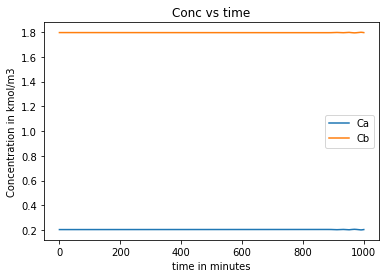

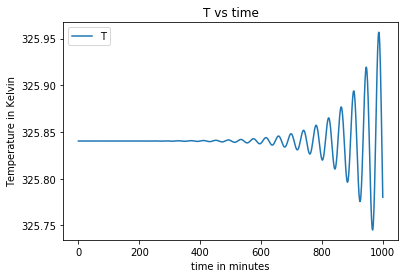

In [3]:
V = 1 #m3
tau = 30 #min
v0 = V/tau #m3/min
Tset  = 298 #K
T0 = 298 #K
Tm = 298 #K
Cp = [4,4] #kJ/kgK
Ca0 = 2 #kmol/m3
km = 0.004 #1/min
ER = 1.5*(10**4) #K
rho = 1000 #kg/m3
dHrxn0  = -2.2*(10**5) #kJ/kmol
U =  340 #kJ/min/K
alpha = [-1,1]
Cp = [4*rho/Ca0,4*rho/Ca0] #kJ/kmol
Fa0 = Ca0*v0
Fb0 = 0
F0 = [Fa0,Fb0,T0]
Ninit = [0.2030319,1.796968,325.840349617444985597103368490934371948242187500]
import numpy as np

def transient_cstr (N,t):
    Na,Nb,T = N
    Ca = Na/V
    Cb = Nb/V
    
    
    Fa = Na*v0/V
    Fb = Nb*v0/V
    dcp = np.dot(Cp,alpha)
    dHrxn = dHrxn0 + dcp*(T-T0) #delta H reaction as a function of temperature
    k = km*np.exp(-ER*(1/T-1/T0)) #k at given temperature
    Ca = Na/V
    r = k*Ca
    ra = -r
    rb = r
    dNadt = Fa0 - Fa + ra*V
    dNbdt = Fb0 - Fb + rb*V
    Qdot = U*(Tm-T)
    dTdt = ((Fa0*Cp[0]+Fb0*Cp[1])*(T0-T)-dHrxn0*r*V+Qdot)/(Na*Cp[0]+Nb*Cp[1])
    return [dNadt,dNbdt,dTdt]

t = np.linspace(0,1000,1000)
from scipy.integrate import odeint as o
a = o(transient_cstr,Ninit,t)
import matplotlib.pyplot as plt
#print(a)
plt.plot(t,a[:,0],t,a[:,1])
plt.xlabel("time in minutes")
plt.ylabel("Concentration in kmol/m3")
plt.title("Conc vs time")
plt.legend(["Ca","Cb"])
plt.show()


plt.plot(t,a[:,2])
plt.xlabel("time in minutes")
plt.ylabel("Temperature in Kelvin")
plt.title("T vs time")
plt.legend(["T"])
plt.show()

#### Now plot $C_A$ and T again, but perturb\* the initial concentration of A by +0.001 M, and perturb\* the initial temperature by +0.001 K. Do you think that it would be feasible to maintain the process at the steady-state conditions you found above? Why or why not? (4 points)

*In this case, "perturb" means to simply change the value by a small amount

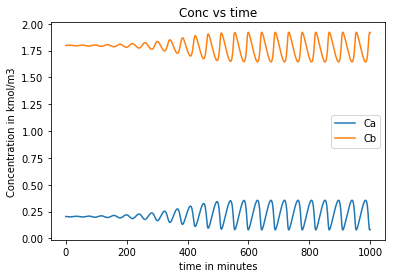

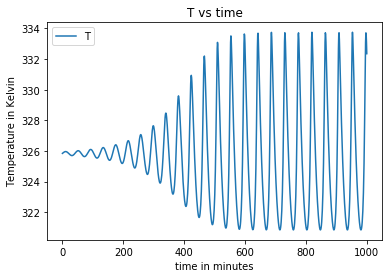

We can brute force the system into a steady state but it will not remain stable as Ca, Cb oscillate as quasi-steady state conditions


In [4]:
V = 1 #m3
tau = 30 #min
v0 = V/tau #m3/min
Tset  = 298 #K
T0 = 298 #K
Tm = 298 #K
Cp = [4,4] #kJ/kgK
Ca0 = 2 #kmol/m3
km = 0.004 #1/min
ER = 1.5*(10**4) #K
rho = 1000 #kg/m3
dHrxn0  = -2.2*(10**5) #kJ/kmol
U =  340 #kJ/min/K
alpha = [-1,1]
Cp = [4*rho/Ca0,4*rho/Ca0] #kJ/kmol
Fa0 = Ca0*v0
Fb0 = 0
F0 = [Fa0,Fb0,T0]
Ninit = [0.2030319+0.001,1.796968+0.001,325.840349617444986+0.001]
import numpy as np

def transient_cstr (N,t):
    Na,Nb,T = N
    Ca = Na/V
    Cb = Nb/V
    
    
    Fa = Na*v0/V
    Fb = Nb*v0/V
    dcp = np.dot(Cp,alpha)
    dHrxn = dHrxn0 + dcp*(T-T0) #delta H reaction as a function of temperature
    k = km*np.exp(-ER*(1/T-1/T0)) #k at given temperature
    Ca = Na/V
    r = k*Ca
    ra = -r
    rb = r
    dNadt = Fa0 - Fa + ra*V
    dNbdt = Fb0 - Fb + rb*V
    Qdot = U*(Tm-T)
    dTdt = ((Fa0*Cp[0]+Fb0*Cp[1])*(T0-T)-dHrxn0*r*V+Qdot)/(Na*Cp[0]+Nb*Cp[1])
    return [dNadt,dNbdt,dTdt]

t = np.linspace(0,1000,1000)
from scipy.integrate import odeint as o
a = o(transient_cstr,Ninit,t)
import matplotlib.pyplot as plt
#print(a)
plt.plot(t,a[:,0],t,a[:,1])
plt.xlabel("time in minutes")
plt.ylabel("Concentration in kmol/m3")
plt.title("Conc vs time")
plt.legend(["Ca","Cb"])
plt.show()


plt.plot(t,a[:,2])
plt.xlabel("time in minutes")
plt.ylabel("Temperature in Kelvin")
plt.title("T vs time")
plt.legend(["T"])
plt.show()

print("We can brute force the system into a steady state but it will not remain stable as Ca, Cb oscillate as quasi-steady state conditions")


# Bonus
#### Vary the residence time from 5 to 30 and identify the residence time at which the steady state becomes stable, to the nearest minute (4 points maximum)

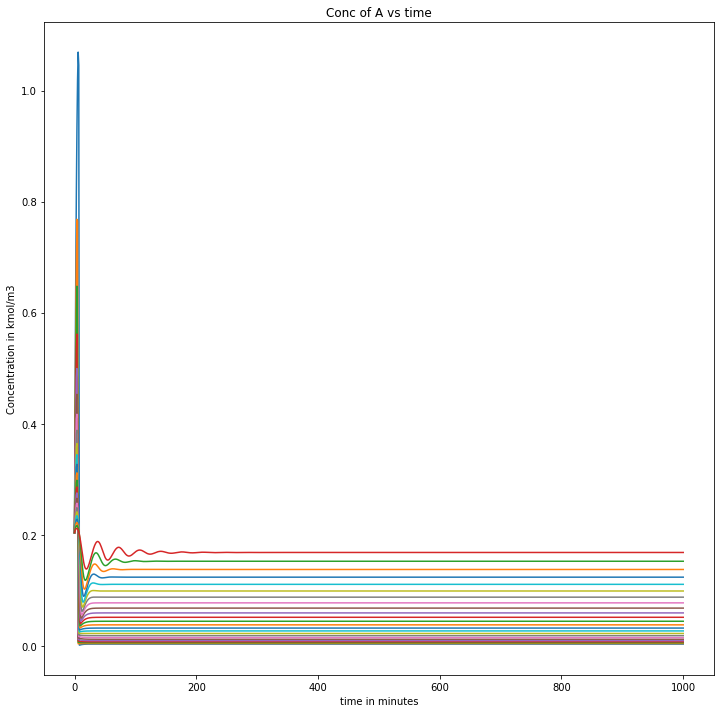

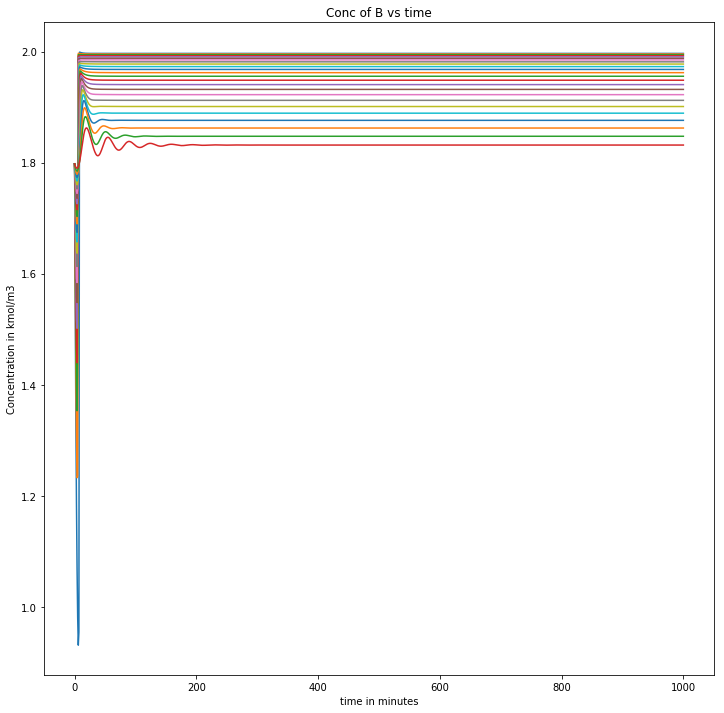

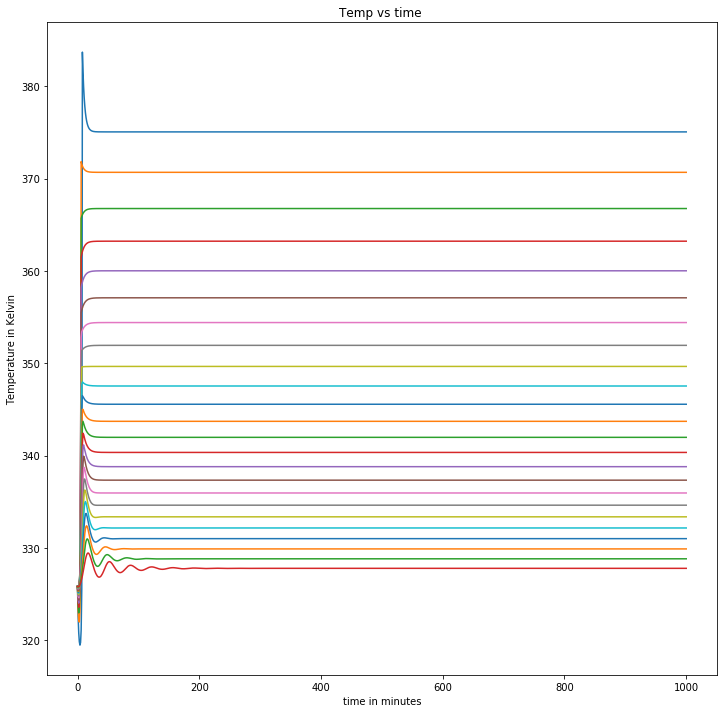

The system reaches a stable steady state for tau less than 29 min
We get oscillations as tau reaches 30 min


In [6]:
from scipy.integrate import odeint as o
import numpy as np
import matplotlib.pyplot as plt
width = 12
height = 12
tau1= []
i=0
for tau in range (5,30):
    V = 1 #m3
    
    v0 = V/tau #m3/min
    Tset  = 298 #K
    T0 = 298 #K
    Tm = 298 #K
    Cp = [4,4] #kJ/kgK
    Ca0 = 2 #kmol/m3
    km = 0.004 #1/min
    ER = 1.5*(10**4) #K
    rho = 1000 #kg/m3
    dHrxn0  = -2.2*(10**5) #kJ/kmol
    U =  340 #kJ/min/K
    alpha = [-1,1]
    Cp = [4*rho/Ca0,4*rho/Ca0] #kJ/kmol
    Fa0 = Ca0*v0
    Fb0 = 0
    F0 = [Fa0,Fb0,T0]
    Ninit = [0.2030319+0.001,1.796968+0.001,325.840349617444986+0.001]
    
    def transient_cstr (N,t):
        Na,Nb,T = N
        Ca = Na/V
        Cb = Nb/V


        Fa = Na*v0/V
        Fb = Nb*v0/V
        dcp = np.dot(Cp,alpha)
        dHrxn = dHrxn0 + dcp*(T-T0) #delta H reaction as a function of temperature
        k = km*np.exp(-ER*(1/T-1/T0)) #k at given temperature
        Ca = Na/V
        r = k*Ca
        ra = -r
        rb = r
        dNadt = Fa0 - Fa + ra*V
        dNbdt = Fb0 - Fb + rb*V
        Qdot = U*(Tm-T)
        dTdt = ((Fa0*Cp[0]+Fb0*Cp[1])*(T0-T)-dHrxn0*r*V+Qdot)/(Na*Cp[0]+Nb*Cp[1])
        return [dNadt,dNbdt,dTdt]
    tau1.append(tau)

    t = np.linspace(0,1000,1000)
    
    a = o(transient_cstr,Ninit,t)
    if abs(a[990,0]-a[950,0])>0.00001: #Break the loop when oscillations start occuring at near-steady state timescale
        break
    
    plt.figure(1,figsize=(width, height))
    plt.plot(t,a[:,0])
    plt.xlabel("time in minutes")
    plt.ylabel("Concentration in kmol/m3")
    plt.title("Conc of A vs time")
    
    plt.figure(2,figsize=(width, height))
    plt.plot(t,a[:,1])
    plt.xlabel("time in minutes")
    plt.ylabel("Concentration in kmol/m3")
    plt.title("Conc of B vs time")
    
    
    plt.figure(3,figsize=(width, height))
    plt.xlabel("time in minutes")
    plt.ylabel("Temperature in Kelvin")
    plt.title("Temp vs time ")
    plt.plot(t,a[:,2])

plt.show()
print("The system reaches a stable steady state for tau less than",tau,"min")
print("We get oscillations as tau reaches 30 min")